In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

from tqdm import tqdm
from math import sqrt
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

<Axes: >

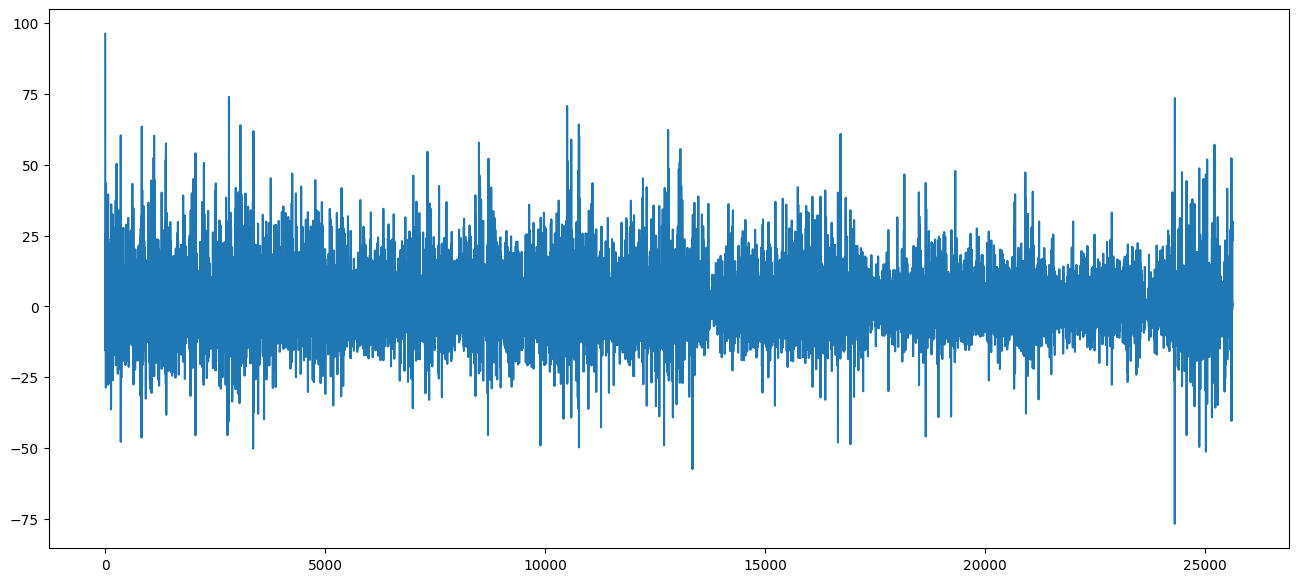

In [2]:
network_analytics = pd.read_csv('./data/Network_Analytics.csv')
series = pd.Series(network_analytics['OutboundUtilzation (%)'])
series.diff().fillna(series).plot(figsize=(16, 7))

                     OutboundUtilzation (%)
Timestamp                                  
2017-10-10 07:01:00                 96.2442
2017-10-10 07:21:00                 99.1131
2017-10-10 07:26:00                 97.2892
2017-10-10 07:31:00                 98.0286
2017-10-10 07:36:00                 99.5263


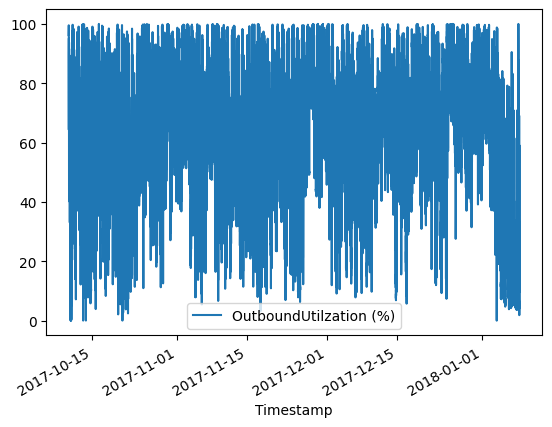

In [3]:
def parser(x):
    return pd.datetime.strptime(x, '%m/%d/%Y %H:%M')

network_analytics = pd.read_csv('./data/Network_Analytics.csv', header=0, parse_dates=[0], index_col=0)
print(network_analytics.head())
network_analytics.plot()
plt.show()
network_analytics.index = network_analytics.index.to_period('M')

                                 SARIMAX Results                                  
Dep. Variable:     OutboundUtilzation (%)   No. Observations:                25631
Model:                              ARIMA   Log Likelihood             -116190.496
Date:                    Tue, 31 Oct 2023   AIC                         232384.992
Time:                            13:53:17   BIC                         232401.295
Sample:                        10-31-2017   HQIC                        232390.262
                             - 01-31-2018                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.3722      0.147    409.326      0.000      60.083      60.661
sigma2       507.0318      5.503     92.131      0.000     496.245     517.818
Ljung-Box (L1) (Q): 

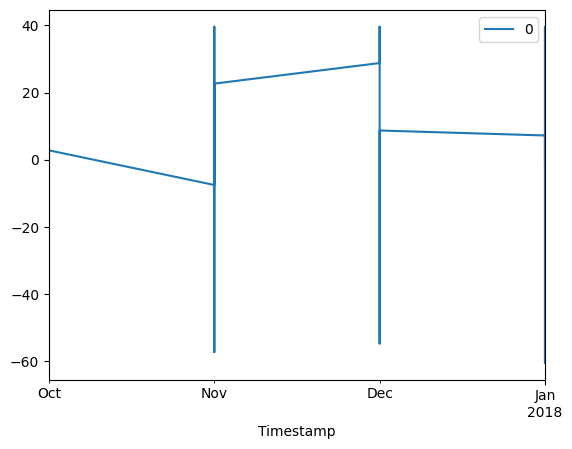

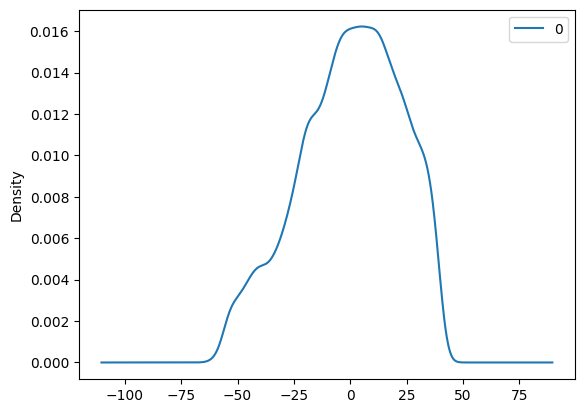

                  0
count  25631.000000
mean       0.000092
std       22.517275
min      -60.372195
25%      -15.498393
50%        1.727957
75%       17.329907
max       39.623257


In [9]:
# fit model
model = ARIMA(network_analytics)
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

513


  0%|          | 1/513 [00:00<04:55,  1.73it/s]

predicted=14.098458, expected=25.789500


 20%|█▉        | 101/513 [01:01<04:27,  1.54it/s]

predicted=10.823964, expected=5.732530


 39%|███▉      | 201/513 [02:04<03:10,  1.64it/s]

predicted=5.553263, expected=5.226370


 59%|█████▊    | 301/513 [03:06<02:19,  1.52it/s]

predicted=8.340060, expected=7.270310


 78%|███████▊  | 401/513 [04:08<01:11,  1.57it/s]

predicted=33.609927, expected=27.390800


 98%|█████████▊| 501/513 [05:10<00:08,  1.49it/s]

predicted=2.765070, expected=2.650150


100%|██████████| 513/513 [05:19<00:00,  1.61it/s]

Test RMSE: 9.809


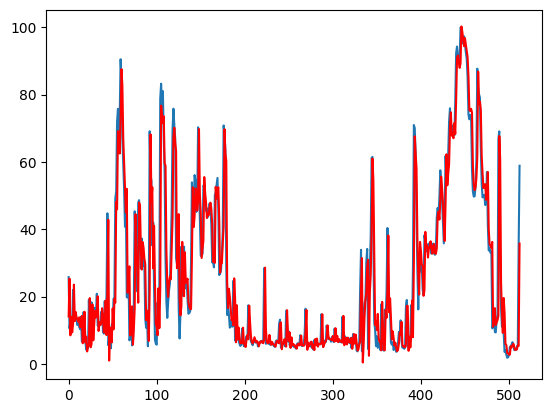

In [7]:
X = network_analytics.values
size = int(len(X) * 0.98)
train, test = X[0:size], X[size:len(X)]
print(len(test))
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in tqdm(range(len(test))):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    if t % 100 == 0:
        print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

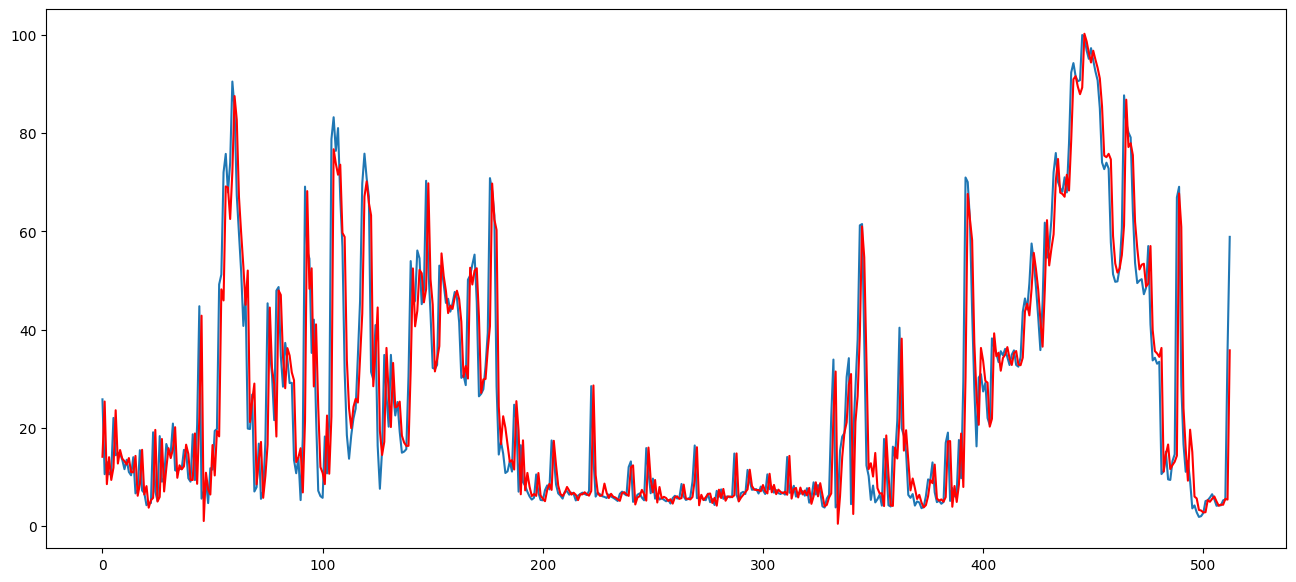

In [15]:
plt.subplots(figsize=(16, 7))
plt.plot(test)
plt.plot(predictions, color='red')